In [20]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
ctrial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
full_data = pd.merge(ctrial_data,mouse_data, on="Mouse ID")

# Display the data table for preview
full_data.sort_values(by='Timepoint').head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1535,i635,0,45.0,0,Propriva
565,g791,0,45.0,0,Ramicane
1545,w746,0,45.0,0,Propriva
1547,r107,0,45.0,0,Propriva


## Tumor Response to Treatment

In [21]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = full_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_response = pd.DataFrame({"Tumor Volume (mm3)": mean_tumor_volume})
mean_tumor_response.reset_index(inplace = True)

# Preview DataFrame
mean_tumor_response

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume = full_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_tumor_response = pd.DataFrame({"Tumor Volume (mm3)": sem_tumor_volume})
sem_tumor_response.reset_index(inplace = True)

# Preview DataFrame
sem_tumor_response.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [22]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_response_trans = mean_tumor_response.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
sem_tumor_response_trans = sem_tumor_response.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
# Preview that Reformatting worked
mean_tumor_response_trans.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
## Trial to get chart done directly from pivot table - unsuccessful
# g1_means = mean_tumor_response_trans.iloc[:,[0, 2, 3, 5]]
# g1_error = sem_tumor_response_trans.iloc[:,[0, 2, 3, 5]]

# a = g1_means.plot(kind = 'line', xlim = (-3, 49), title = "Tumor Response to Treatment", color = ['red','blue','green','black'], legend = True, yerr = g1_error, marker="o",markersize=5)
# a.grid(axis='y')
# a.set_xlabel("Time (days)")
# a.set_ylabel("Tumor Volume (mm3)")

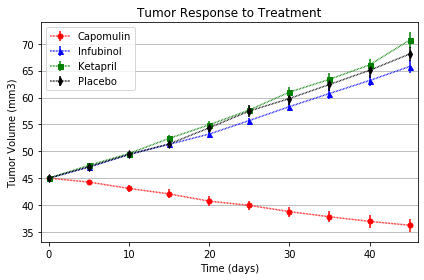

In [6]:
# Generate the Plot (with Error Bars)

g1_means_capomulin = mean_tumor_response_trans.iloc[:,0]
g1_error_capomulin = sem_tumor_response_trans.iloc[:,0]
g1_means_infubinol = mean_tumor_response_trans.iloc[:,2]
g1_error_infubinol = sem_tumor_response_trans.iloc[:,2]
g1_means_ketapril = mean_tumor_response_trans.iloc[:,3]
g1_error_ketapril = sem_tumor_response_trans.iloc[:,3]
g1_means_placebo = mean_tumor_response_trans.iloc[:,5]
g1_error_placebo = sem_tumor_response_trans.iloc[:,5]

g1_means_capomulin.plot(kind = 'line', xlim = (-1, 46), linestyle=(0, (0.5, 0.5)), yerr = g1_error_capomulin, color = 'red', marker='o',markersize=5)
g1_means_infubinol.plot(kind = 'line', xlim = (-1, 46), linestyle=(0, (0.5, 0.5)), yerr = g1_error_infubinol, color = 'blue', marker='^',markersize=5)
g1_means_ketapril.plot(kind = 'line', xlim = (-1, 46), linestyle=(0, (0.5, 0.5)), yerr = g1_error_ketapril, color = 'green', marker='s',markersize=5)
g1_means_placebo.plot(kind = 'line', xlim = (-1, 46), linestyle=(0, (0.5, 0.5)), yerr = g1_error_placebo, color = 'black', marker='d',markersize=5)
plt.grid(axis='y')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.tight_layout()

# Save the Figure
plt.savefig("treatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic = full_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame

mean_metastatic = pd.DataFrame({"Metastatic Sites": mean_metastatic})

# Preview DataFrame
mean_metastatic.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metastatic = full_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
sem_metastatic = pd.DataFrame({"Metastatic Sites": sem_metastatic})

# Preview DataFrame
sem_metastatic.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_trans = mean_metastatic.reset_index().pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
sem_metastatic_trans = sem_metastatic.reset_index().pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
# Preview that Reformatting worked
mean_metastatic_trans.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


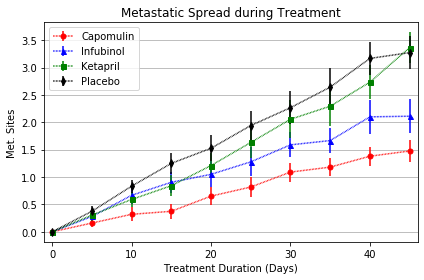

In [24]:
# Generate the Plot (with Error Bars)

g2_means_capomulin = mean_metastatic_trans.iloc[:,0]
g2_error_capomulin = sem_metastatic_trans.iloc[:,0]
g2_means_infubinol = mean_metastatic_trans.iloc[:,2]
g2_error_infubinol = sem_metastatic_trans.iloc[:,2]
g2_means_ketapril = mean_metastatic_trans.iloc[:,3]
g2_error_ketapril = sem_metastatic_trans.iloc[:,3]
g2_means_placebo = mean_metastatic_trans.iloc[:,5]
g2_error_placebo = sem_metastatic_trans.iloc[:,5]

g2_means_capomulin.plot(kind = 'line', xlim = (-1, 46), linestyle=(0, (0.5, 0.5)), yerr = g2_error_capomulin, color = 'red', marker='o',markersize=5)
g2_means_infubinol.plot(kind = 'line', xlim = (-1, 46), linestyle=(0, (0.5, 0.5)), yerr = g2_error_infubinol, color = 'blue', marker='^',markersize=5)
g2_means_ketapril.plot(kind = 'line', xlim = (-1, 46), linestyle=(0, (0.5, 0.5)), yerr = g2_error_ketapril, color = 'green', marker='s',markersize=5)
g2_means_placebo.plot(kind = 'line', xlim = (-1, 46), linestyle=(0, (0.5, 0.5)), yerr = g2_error_placebo, color = 'black', marker='d',markersize=5)
plt.grid(axis='y')
plt.title("Metastatic Spread during Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend()
plt.tight_layout()

# Save the Figure
plt.savefig("spread.png")

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice = full_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
mice = pd.DataFrame({"Mouse count": count_mice})
mice.reset_index(inplace = True)

# Preview DataFrame
mice.head()

,Drug,Timepoint,Mouse count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_trans = mice.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse count')
# Preview the Data Frame
survival_rate_trans.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


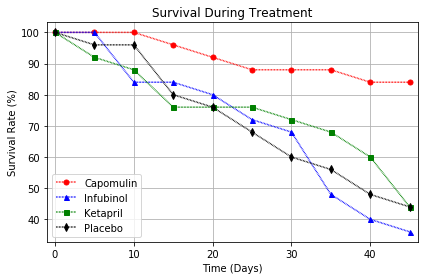

In [27]:
# Generate the Plot

g3_surv_capomulin = ( survival_rate_trans.iloc[:,0] / survival_rate_trans.iloc[0,0] ) * 100
g3_surv_infubinol = ( survival_rate_trans.iloc[:,2] / survival_rate_trans.iloc[0,2] ) * 100
g3_surv_ketapril = ( survival_rate_trans.iloc[:,3] / survival_rate_trans.iloc[0,3] ) * 100
g3_surv_placebo = ( survival_rate_trans.iloc[:,5] / survival_rate_trans.iloc[0,5] ) * 100

g3_surv_capomulin.plot(kind = 'line', xlim = (-1, 46), linestyle=(0, (0.5, 0.5)), color = 'red', marker='o',markersize=5)
g3_surv_infubinol.plot(kind = 'line', xlim = (-1, 46), linestyle=(0, (0.5, 0.5)), color = 'blue', marker='^',markersize=5)
g3_surv_ketapril.plot(kind = 'line', xlim = (-1, 46), linestyle=(0, (0.5, 0.5)), color = 'green', marker='s',markersize=5)
g3_surv_placebo.plot(kind = 'line', xlim = (-1, 46), linestyle=(0, (0.5, 0.5)), color = 'black', marker='d',markersize=5)
plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend()
plt.tight_layout()

# Save the Figure
plt.savefig("survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug

percent_changes = ((mean_tumor_response_trans.iloc[-1] - mean_tumor_response_trans.iloc[0]) / mean_tumor_response_trans.iloc[0]) * 100
percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

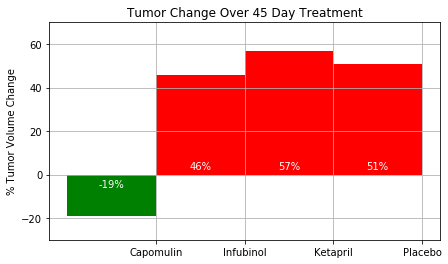

In [15]:
# Set variables for the bar chart

x_axis = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
y_axis = [ int(percent_changes[drug])  for drug in x_axis]
colors = ['green' if y < 0 else 'red' for y in y_axis]

# Draw the chart

fig, g4 = plt.subplots(figsize=(7,4))
bars = g4.bar(x_axis, y_axis, width = -1, align = 'edge', color = colors)
g4.set_ylabel('% Tumor Volume Change')
g4.set_title('Tumor Change Over 45 Day Treatment')
g4.set_ylim(-30,70)
g4.grid()

for bar in bars:
        height = bar.get_height()
        if height > 0:
            place = 0
        else:
            place = -8
        g4.annotate('{}%'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, place),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords=('offset points'),
                    ha='center', va='bottom',
                    color = 'white')

# Save the Figure
plt.savefig("change.png")

# Show the Figure
fig.show()